# Wave Equation CTCS + FDE Solution

## 1. Project Brief
Solve wave equation using Centered Time & Centered Space finite difference equations (CTCS + FDE).
Code should include: 
 -  Plots/Animations 
 -  Von Neumann Criterion

## 2. Key Equations 

Wave Equation PDE: $$\frac{\partial^{2} u}{\partial t^{2}} = c^{2}\frac{\partial^{2} u}{\partial x^{2}}$$ 

Wave Equation FDE: 
$$ \frac{U_j^{i+1} - 2U_j^i + U_j^{i-1}}{\Delta t^2} = c^2\frac{U_{j+1}^i - 2U_j^i + U_{j-1}^i}{\Delta x^2}$$ 

Recursion Equation: 

$$ U_j^{i+1} = 2U_j^i - U_j^{i-1} + \mu (U_{j+1}^i - 2 U_j^i + U_{j-1}^i) $$ 

Where: 

$$ \mu = (c\frac{\Delta t}{\Delta x})^2 $$ 


## 1.3 Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

## 1.4 Conditions
Define initial, boundary and discretisation conditions. 

I have chosen a standing wave to demonstrate the script.

In [3]:
# Parameters for problem
min_x , max_x = 0 , 2*np.pi

min_t , max_t = 0 , 6

c = 2

# Choice of number of space and time steps
space_steps = 150
time_steps = 300

# Initialize space and time steps
delta_xs = np.linspace(start = min_x,stop = max_x,num = space_steps) 
delta_ts = np.linspace(start = min_t,stop = max_t,num = time_steps) 

# Calculate ∆x and ∆t based on deltas 
delta_x = delta_xs[1] - delta_xs[0]
delta_t = delta_ts[1] - delta_ts[0]

# Calculate µ 
mu = (c*(delta_t/delta_x))**2

# Initial Conditions  u(x,0) = 2sin(x + 0) 
u_n = [2*np.sin(x) for x in delta_xs]



u_j = [(np.sin(-c*t) + np.sin(c*t)) for t in delta_ts]

print('c =',c)  
print('∆t =',round(delta_t,2)) 
print('∆x =',round(delta_x,2)) 
print('µ =',round(mu,2))
if mu <= 1: 
    print('According to the Von Neumann Condition our solution is stable as: µ =',round(mu,2),'≤ 1') 
else: 
    print('According to the Von Neumann Condition our solution is unstable as: µ =',round(mu,5),'> 1') 
    print('Please change your inputs so that µ ≤ 1.')

c = 2
∆t = 0.02
∆x = 0.04
µ = 0.91
According to the Von Neumann Condition our solution is stable as: µ = 0.91 ≤ 1


## 1.5 Initialise Solution Matrix
Initialize a matrix with all zero entries. Then add initial and boundary conditions arrays accordingly.

In [4]:
matrix = np.zeros([time_steps,space_steps]) 
matrix[0,:] = u_n 
matrix[:,0] = u_j 

## 1.6 Calculate Entries for Solution Matrix
Calculate values of u(x,t) for each grid point. 
Recursion Equation: 

$$ U_j^{i+1} = 2U_j^i - U_j^{i-1} + \mu (U_{j+1}^i - 2 U_j^i + U_{j-1}^i) $$ 

For the CTCS scheme we need the values of the u(x,t) function at t = 0 and  t = final time. 

We need to treat the first ∆t (first time step) differently to the others. If we arrange our recursion equation so that we are at the first time step we get: 

$$ U_j^{1} = 2U_j^{0} - U_j^{-1} + \mu (U_{j+1}^0 - 2 U_j^0 + U_{j-1}^0) $$  

This yields a $$ U_j^{-1} $$ Depending on the application this may be completely meaningless. Also this is not possible to implement in one loop for all time steps programatically. 

To get around this we can make use of the initial condition. In this example u(x,0) = 0. 

$$ U_j(t + \Delta t) = U(t) + \frac{\partial U_j(t)}{\partial t}\Delta t$$ 

$$ U_j(t - \Delta t) = U(t) + \frac{\partial U_j(t)}{\partial t}(-\Delta t)$$ 

Solve simultaneously and invoke the IC to obtain: 

$$ \frac{\partial U_j(t)}{\partial t} = \frac{U_j(t + \Delta t) - U_j(t - \Delta t)}{2\Delta t} = 0  $$ 

$$  \Rightarrow U_j(t + \Delta t) = U_j(t - \Delta t)$$ 

$$ \Rightarrow U_j^{i-1} = U_j^{i+1} $$ 

The above equation is valid for t = 0. We can now rewrite the recursion equation to use for t = 0, or in our case, the first row of our matrix.  

$$ U_j^{1} = U_j^{0} + \frac{1}{2}\mu(U_{j+1}^0 - 2 U_j^0 + U_{j-1}^0) $$ 

In code this looks like:

In [5]:
for j in range(1,space_steps-1): 
    matrix[1][j] = matrix[0][j] + (1/2) * mu * (matrix[0][j + 1] - 2*matrix[0][j] + matrix[0][j - 1]) 

We can now use the other recursion equation for all other timesteps. 

$$ U_j^{i+1} = 2U_j^i - U_j^{i-1} + \mu (U_{j+1}^i - 2 U_j^i + U_{j-1}^i) $$

In code this looks like:

In [6]:
for i in range(1,time_steps-1): 
    matrix[i+1,1:-1] = 2*matrix[i,1:-1] - matrix[i - 1,1:-1] + mu* (matrix[i,2:] - 2*matrix[i,1:-1] + matrix[i,:-2])

## 1.7 Plot Solution(s)

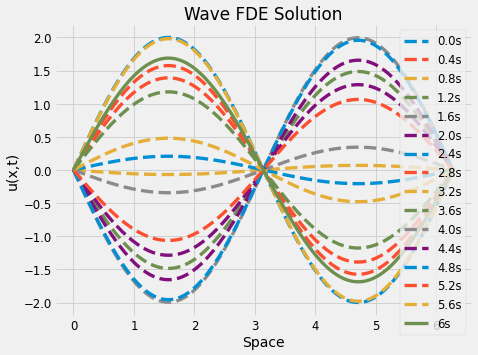

According to the Von Neumann Condition our solution is stable as: µ = 0.91 ≤ 1


In [7]:
%matplotlib inline 
plt.style.use('fivethirtyeight')

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=60)


labels = [] 
for i in range(0,time_steps-1,20):
    plt.plot([x for x in delta_xs],matrix[i],linestyle = 'dashed')   
    labels.append(str(round((i/time_steps)*max_t,2)) + 's')  
plt.plot([x for x in delta_xs],matrix[-1])

labels.append(str(max_t) + 's') 
plt.xlabel('Space') 
plt.ylabel('u(x,t)')  
plt.legend(labels)
plt.title("Wave FDE Solution")  
plt.grid(True) 
plt.savefig('Wave_FDE_Solution_Plot')
plt.show()
if mu <= 1: 
    print('According to the Von Neumann Condition our solution is stable as: µ =',round(mu,2),'≤ 1') 
else: 
    print('According to the Von Neumann Condition our solution is unstable as: µ =',round(mu,2),'> 1')  
    


<IPython.core.display.Javascript object>


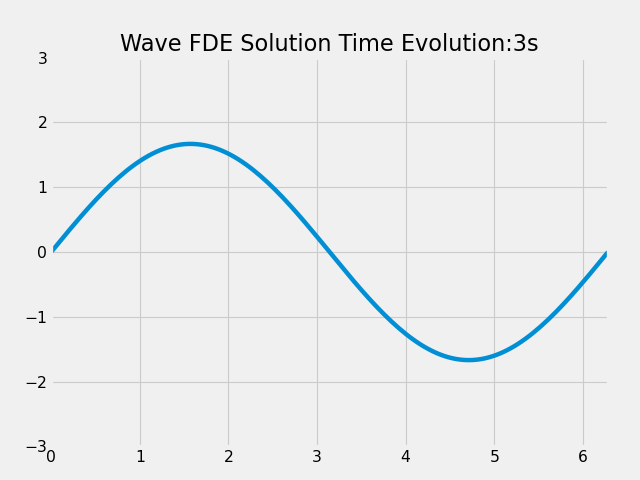

MovieWriter imagemagick unavailable; using Pillow instead.


In [24]:
%matplotlib notebook
plt.style.use('fivethirtyeight')
from matplotlib.animation import FuncAnimation
x = delta_xs 


fig = plt.figure(figsize=(8, 6), dpi=80) 
lines = plt.plot([]) 
line = lines[0] 

plt.xlim(0,delta_xs[-1]) 
plt.ylim(-3,3)
plt.grid(True)  

plt.title('Wave FDE Solution Time Evolution')
def animate(frame): 
    y = matrix[frame] 
    line.set_data((x,y))
    plt.title('Wave FDE Solution Time Evolution:' + str(round((frame/time_steps)*max_t)) + 's')
    #plt.title(str(round((frame/time_steps)*max_t,2))
              
anim = FuncAnimation(fig,animate,frames=time_steps,interval = 10)  
anim.save('WAVE_fde_solution.gif', writer='imagemagick', fps=60)